In [15]:
from PIL import Image
import numpy as np
%matplotlib inline 
#省略plt.show
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

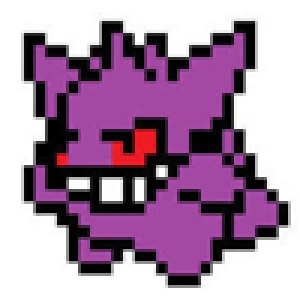

In [16]:
im = Image.open('gengar.jpg').resize((100, 100))
pixels = np.array(im)
Image.fromarray(pixels).resize((300,300), Image.NEAREST)

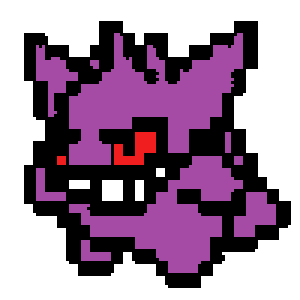

In [17]:
h, w = pixels.shape[:2]
pixels = pixels.reshape(-1, 3)

for id, px in enumerate(pixels):
    if pixels[id][0] > 200 and pixels[id][1] > 200 and pixels[id][2] > 200:
        pixels[id] = [255, 255, 255]
    elif pixels[id][0] > 200 and pixels[id][1] < 50 and pixels[id][2] < 50:
        pixels[id] = [240, 30, 30]
    elif pixels[id][0] < 200 and pixels[id][0] > 140 and pixels[id][1] < 90 and pixels[id][1] > 60 and pixels[id][2] < 200 and pixels[id][2] > 140:
        pixels[id] = [165, 75, 165]
    else:
        pixels[id] = [0, 0, 0]


palette = list(set(tuple(x) for x in pixels))
reverse_palette = {c:i for i, c in enumerate(palette)}

Image.fromarray(pixels.reshape(100,100,3)).resize((300,300), Image.NEAREST)

In [18]:
X = np.mgrid[0:h, 0:w].reshape(2, -1).T
y = np.array([reverse_palette[tuple(x)] for x in pixels])

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
#clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=1.)

clf=MLPClassifier(hidden_layer_sizes=(256,64), learning_rate_init=1e-3, max_iter=1500, solver="lbfgs")
#clf = BaggingClassifier(MLPClassifier(hidden_layer_sizes=(512,), learning_rate_init=1e-3, max_iter=1000, solver="lbfgs"), max_samples=0.5, max_features=1.)

X_mean = X.mean(axis=0,keepdims=True)
X_std = X.std(keepdims=True)
W = (X - X_mean)/X_std
X2 = np.concatenate( [W, W**2, (W[:, 0]*W[:, 1])[:, None] ], axis= 1)
X2_mean = X2.mean(axis=0,keepdims=True)
X2_std = X2.std(keepdims=True)
print(X.shape)
clf.fit((X2-X2_mean)/X2_std, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:800j, y_min:y_max:800j]
W = (grid.reshape(2, -1).T - X_mean)/X_std
W2 = np.concatenate( [W, W**2,  (W[:, 0]*W[:, 1])[:, None] ], axis= 1)
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.predict( (W2-X2_mean)/X2_std )

(10000, 2)


C:\Users\tengwc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<ipython-input-20-c0b07002bd93>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1)


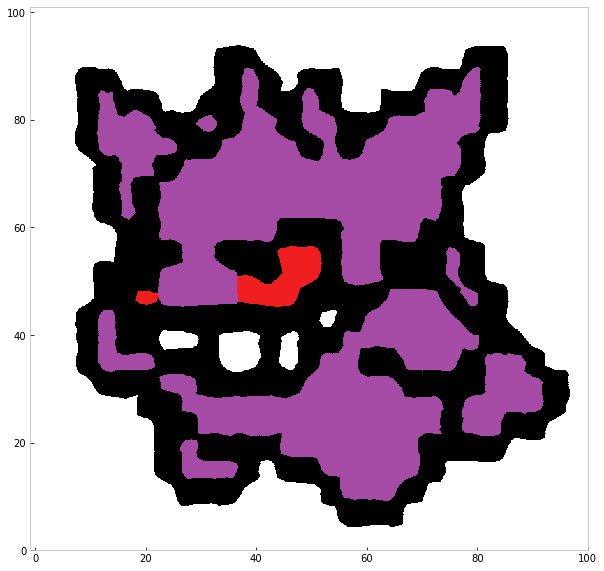

In [20]:
Z  = Z.reshape(grid.shape[1:])
from matplotlib.colors import LinearSegmentedColormap
cm= LinearSegmentedColormap.from_list(
        "cmm", np.array(palette)/255 )
matplotlib.rcParams['figure.figsize']=(10,10*h/w)
plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1)